<a href="https://www.kaggle.com/code/mikedelong/do-more-expensive-items-get-more-reviews?scriptVersionId=141267103" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
from numpy import log
df = pd.read_csv(filepath_or_buffer='/kaggle/input/flipkart-redmi-mobiles/mobiles.csv', index_col=[0], )
df['Price'] = df['Price'].apply(lambda x: int(''.join(filter(str.isdigit, x))))
df['rating_count'] = df['Review'].apply(lambda x: int(''.join(filter(str.isdigit, x.split()[0]))))
df['review_count'] = df['Review'].apply(lambda x: int(''.join(filter(str.isdigit, x.split()[3]))))
df['log_review_count'] = log(1 + df['review_count']) # we have some zero values so we add one
df.head()

,Name,Price,Review,rating_count,review_count,log_review_count
0,"Redmi 6 (Rose Gold, 32 GB)",8999,"5,60,128 Ratings & 40,361 Reviews",560128,40361,10.605644
1,"Mi 11X (Celestial Silver, 128 GB)",21859,"3,024 Ratings & 293 Reviews",3024,293,5.683580
2,"Mi 10T (Lunar Silver, 128 GB)",22999,"4,076 Ratings & 569 Reviews",4076,569,6.345636
3,"REDMI Note 11 Pro (Stealth Black, 128 GB)",20765,"1,467 Ratings & 104 Reviews",1467,104,4.653960
4,"Redmi 8A (Sunset Red, 32 GB)",7999,"1,61,944 Ratings & 11,139 Reviews",161944,11139,9.318298


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 3051
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2277 non-null   object 
 1   Price             2277 non-null   int64  
 2   Review            2277 non-null   object 
 3   rating_count      2277 non-null   int64  
 4   review_count      2277 non-null   int64  
 5   log_review_count  2277 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 124.5+ KB


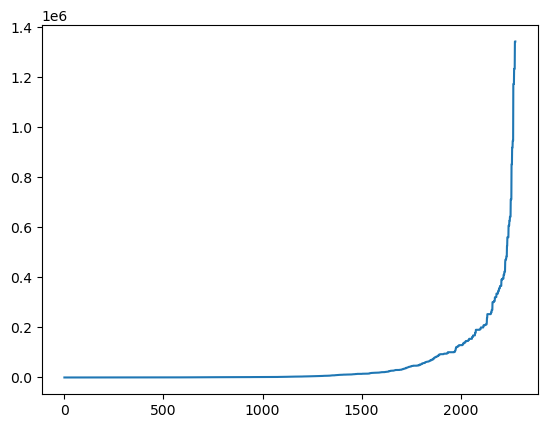

In [3]:
from matplotlib.pyplot import plot
plot(sorted(df['rating_count'].values))

Our rating count data is exponential, which is not surprising; popular or expensive items tend to garner lots of ratings.

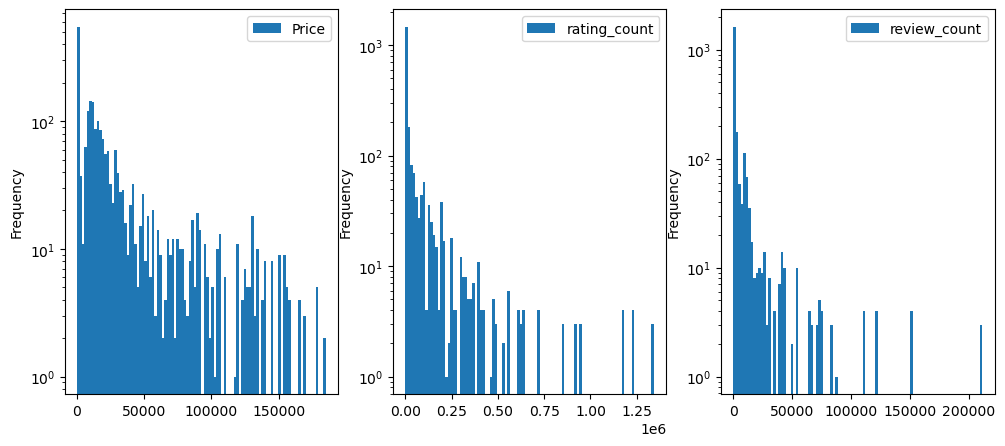

In [4]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(12, 5), ncols=3)
for index, column in enumerate(['Price', 'rating_count', 'review_count']):
    df[column].plot.hist(ax=ax[index], bins=100, legend=True, log=True)

First of all I think we want to know if review and rating are essentially the same thing.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='rating_count', ylabel='review_count'>

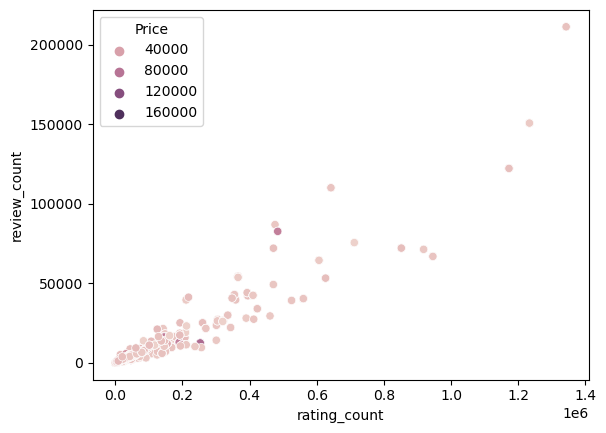

In [5]:
from seaborn import scatterplot
scatterplot(data=df, x='rating_count', y='review_count', hue='Price',)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


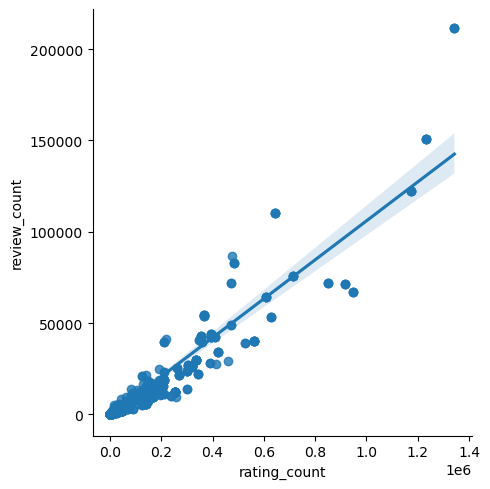

In [6]:
from seaborn import lmplot
lmplot(data=df, x='rating_count', y='review_count',)

These are sort-of linear, so let's look at plotting just one of them as a function of price.

In [7]:
from plotly.express import scatter
scatter(data_frame=df, x='Price', y='rating_count', hover_name='Name', color='log_review_count', log_x=True, log_y=True,
       hover_data=['review_count']).show()

All three quantities are exponentially distributed but rating count and review count are linearly related, while price is almost unrelated.

<Axes: >

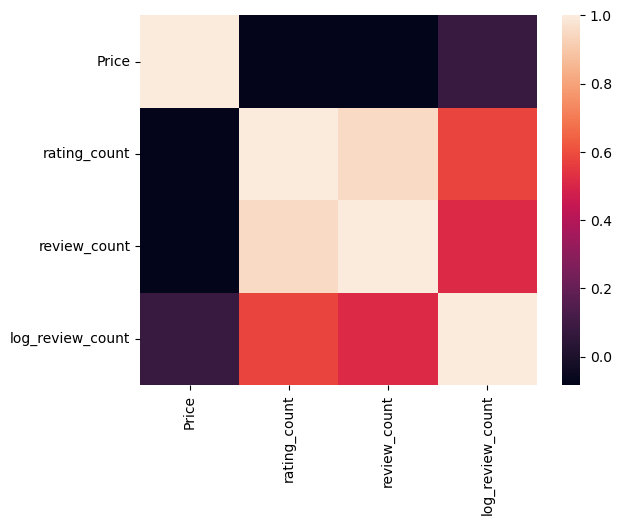

In [8]:
from seaborn import heatmap
heatmap(data=df.corr(numeric_only=True))